# introduction 


This comprehensive dataset offers detailed information on approximately 17,000 FIFA football players, meticulously scraped from SoFIFA.com.

It encompasses a wide array of player-specific data points, including but not limited to player names, nationalities, clubs, player ratings, potential, positions, ages, and various skill attributes. This dataset is ideal for football enthusiasts, data analysts, and researchers seeking to conduct in-depth analysis, statistical studies, or machine learning projects related to football players' performance, characteristics, and career progressions.

##  Analysis of the DataSet (questions that is analyized in the dataset):


    1- correlation between overall_rating , wage_euro and value_euro
    2- relationship between overall_rating and wage_euro
    3- the top 15 positions of the players and how many player in each position
    4- the players that strike with the right foot and the left foot.
    5- the top  players in overall rating in FIFA .
    6- the top players in FIFA .
        - value euro
        - wage euro
    7- top countries that have professional players.
    8- Box Plot in overall rating 
    

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# General Properties

In [18]:
# Load csv file named fifa_players.csv into data frame DF
df = pd.read_csv("fifa_players.csv")

In [19]:
# print a sampel of 10 player to anderstand the data
df.sample(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
14118,C. Oliveira Souza,Cauly Oliveira Souza,9/15/1995,23,172.72,68.0,"RM,LM",Brazil,70,79,...,60,56,30,68,70,53,72,59,51,37
68,Malcom,Malcom Filipe Silva de Oliveira,2/26/1997,22,172.72,73.9,RW,Brazil,82,89,...,85,53,26,78,81,68,78,21,28,17
10528,M. Amini,Mustafa Amini,4/20/1993,25,175.26,74.8,CM,Australia,65,69,...,61,66,55,63,67,45,61,59,54,51
13292,M. Sissoko,Mohamed Lamine Sissoko Gillan,1/22/1985,34,190.50,84.8,"CDM,CM",Mali,69,69,...,61,77,70,59,69,55,79,70,67,64
14313,T. Bruns,Thomas Bruns,1/7/1992,27,152.40,72.1,CM,Netherlands,70,71,...,66,70,64,70,72,48,71,61,61,57
10481,T. McMahon,Anthony McMahon,3/24/1986,32,154.94,72.1,RB,England,65,65,...,49,66,65,49,58,59,68,66,65,67
9992,F. Alastra,Fabrizio Alastra,10/1/1997,21,185.42,78.9,GK,Italy,64,75,...,17,25,22,17,22,21,51,15,15,18
5532,L. Leroy,Léo Leroy,2/14/2000,19,185.42,78.0,CDM,France,54,72,...,47,51,47,36,53,38,44,45,49,55
10422,J. Sternberg,Janek Sternberg,10/19/1992,26,182.88,77.1,"LB,LM",Germany,65,67,...,48,73,62,50,56,52,50,57,64,59
13480,B. Paulsen,Bjørn Paulsen,7/2/1991,27,190.50,77.1,"CB,RB,CAM",Denmark,69,72,...,62,80,64,63,59,58,56,68,66,64


In [9]:
# print Information of DF
print("\nInformation about DF: ")
df.info()


Information about DF: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot        

# Data Cleaning

Data cleaning is the process of fixing or removing incorrect, duplicate,noisy, or incomplete data within a dataset. Thorugh data cleaning phase, data wrangling has been conducted for modifying the data into a more usable form.

### Problems in the dataset

    1: Check N/A values and modify it with a value (zero or mean or median or stay as it is according to the data)
    
    2: Remove unused Columns national_team (there is nationality column for each player)

    3: Remove duplication in the rows (check and process if exist)
    
    4: modifiy missing data with mean 
    


Check N/A values and modify it with a value (zero or mean or median or stay as it is according to the data)

In [13]:
# Display all information about columns on the dataset
df.isnull().sum()

name                                0
full_name                           0
birth_date                          0
age                                 0
height_cm                           0
weight_kgs                          0
positions                           0
nationality                         0
overall_rating                      0
potential                           0
value_euro                        255
wage_euro                         246
preferred_foot                      0
international_reputation(1-5)       0
weak_foot(1-5)                      0
skill_moves(1-5)                    0
body_type                           0
release_clause_euro              1837
crossing                            0
finishing                           0
heading_accuracy                    0
short_passing                       0
volleys                             0
dribbling                           0
curve                               0
freekick_accuracy                   0
long_passing

Remove unused Columns national_team (there is nationality column for each player)

In [12]:
# drop rows where value of a 'national_team' column is N/A

df = df.drop('national_team' , axis = 1 )
df.isnull().sum()

name                                0
full_name                           0
birth_date                          0
age                                 0
height_cm                           0
weight_kgs                          0
positions                           0
nationality                         0
overall_rating                      0
potential                           0
value_euro                        255
wage_euro                         246
preferred_foot                      0
international_reputation(1-5)       0
weak_foot(1-5)                      0
skill_moves(1-5)                    0
body_type                           0
release_clause_euro              1837
crossing                            0
finishing                           0
heading_accuracy                    0
short_passing                       0
volleys                             0
dribbling                           0
curve                               0
freekick_accuracy                   0
long_passing

 modifiy missing data with mean in columns value_euro , wage_euro and release_clause_euro

In [14]:
# modifiy missing data with mean in columns value_euro , wage_euro and release_clause_euro
df["value_euro"] = df["value_euro"].fillna(df["value_euro"].mean())
df["wage_euro"] = df["wage_euro"].fillna(df["wage_euro"].mean())
df["release_clause_euro"] = df["release_clause_euro"].fillna(df["release_clause_euro"].mean())

In [16]:
df.isnull().sum()

name                             0
full_name                        0
birth_date                       0
age                              0
height_cm                        0
weight_kgs                       0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
release_clause_euro              0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration        

### Descriptive statistics about DF

In [18]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.795400e+04,17954.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.646481e+06,21844.377245,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.250000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.300000e+06,9902.134628,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


From the above result, we get some important insights:

    1- minimum overall_rating = 47, average = 66.24 , and maximum = 94

    2- minimum wage_euro = 1000 , average = 9902 , and maximum = 565000

    3- for value_euro, Maximum profit exceeds 110 million dollar and average is about 24 million dollar 

# Data Visualization

## Question researcher 1 : 
### correlation between overall_rating , wage_euro and value_euro 

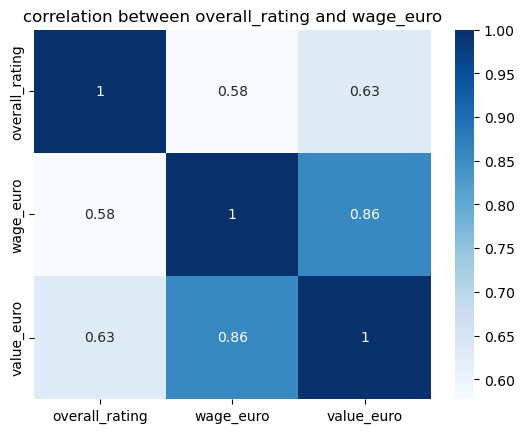

In [20]:
df_ = df[["overall_rating" , "wage_euro" , "value_euro"]]
corr_mat = df_.corr(method = "pearson")
sns.heatmap(corr_mat , cmap = "Blues" , annot = True)
plt.title("correlation between overall_rating and wage_euro")
plt.show()

From the above Heatmap: There is a positive correlation between three variables: overall_rating, wage_euro, and value_euro . correlation is computed for each two variable: There is strong positive correlation between overall_rating and value_euro. besides there is a string positive correlation between wage_euro and value_euro (0.86). in addition there is a positive correlation overall_rating budget and value_euro.

## Question researcher 2 : 
### relationship between overall_rating and wage_euro

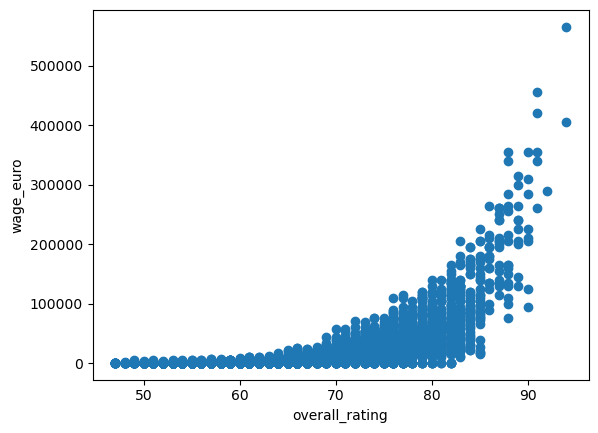

In [23]:
plt.scatter(df["overall_rating"] , df["wage_euro"] )
plt.xlabel("overall_rating")
plt.ylabel("wage_euro")
plt.show()

from the fig we got postive relations between overall rating and wage_euro when a overall rating increas wage increas


## positions


## Question researcher 3 : 
###  the top 15 positions of the players and how many player in each position

In [58]:
correlation = df_csv["age"].corr(df_csv["overall_rating"])item_counts = df['positions'].value_counts()
item_counts.head(15)

positions
CB        2243
GK        2065
ST        1747
CM         764
CDM,CM     709
LB         672
CM,CDM     632
RB         605
CDM        321
CB,RB      268
RM         261
CAM        250
LM         223
RM,LM      219
CB,LB      207
Name: count, dtype: int64

### top 15 positions

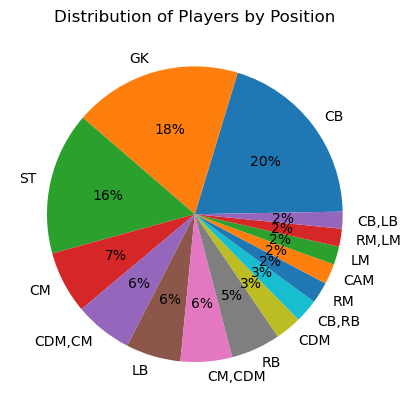

In [22]:

data = {'num': [2243, 2056, 1747, 764, 709, 672, 632, 605, 321, 286, 261, 250, 223, 219, 207],
        'pos': ['CB','GK','ST','CM','CDM,CM','LB','CM,CDM','RB','CDM','CB,RB','RM','CAM','LM','RM,LM','CB,LB']}
df1 = pd.DataFrame(data)

# Plotting the pie chart
plt.pie(df1['num'], labels=df1['pos'], autopct='%1.0f%%', startangle=1)
plt.title('Distribution of Players by Position')
plt.show()


in the above piechart there is 15 position in the team,the top position :

    1- first position is Center Back there is 20% of the players (2243) in it.
  
    2- Second position is Goal keeper there is 18% of the players (2065) in it.
  
    3- Third position is Striker there is 16% of the players (1747) in it.
  
    4- Last positions is two positions Center and Left back these players play in both positions there is 2% players (207).

## preferred_foot


## Question researcher 4 :
### the players that strike with the right foot and the left foot.

In [77]:
item = df['preferred_foot'].value_counts()
item

preferred_foot
Right    13781
Left      4173
Name: count, dtype: int64

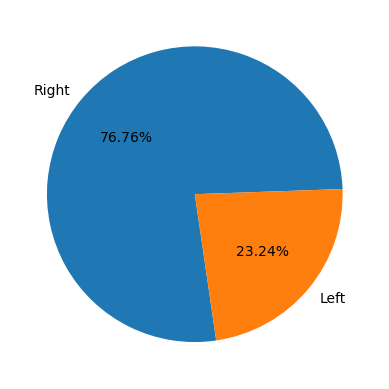

In [8]:
num = [13781 , 4173 ]
foot = ["Right" , "Left" ]

plt.pie(num , labels = foot , autopct='%1.2f%%', startangle=2 )

plt.show()

There are two types of players first one strike with right foot and the second with the left foot :

    1- first type the right foot is 76.76% (13781)player.
    2- second type is the left foot is 23.24% (4173)player.


# top player 

### top  player in overall_rating

## Question researcher 5 :
### the top  players in overall rating in FIFA .

In [10]:
top_o_v = df[df["overall_rating"] > 90]

In [21]:
top_o_v

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
17938,L. Suárez,Luis Alberto Suárez Díaz,1/24/1987,32,182.88,86.2,ST,Uruguay,91,91,...,85,87,41,92,84,85,85,62,45,38
17939,L. Modrić,Luka Modrić,9/9/1985,33,172.72,66.2,CM,Croatia,91,91,...,82,62,83,79,92,82,90,68,76,73
17940,E. Hazard,Eden Hazard,1/7/1991,28,172.72,76.2,"LW,CF",Belgium,91,91,...,80,54,41,87,89,86,91,34,27,22
17941,K. De Bruyne,Kevin De Bruyne,6/28/1991,27,154.94,69.9,"CAM,CM",Belgium,91,92,...,91,76,61,87,94,79,90,68,58,51
17942,De Gea,David De Gea Quintana,11/7/1990,28,193.04,76.2,GK,Spain,91,93,...,12,38,30,12,68,40,70,25,21,13
17943,Neymar Jr,Neymar da Silva Santos Junior,2/5/1992,27,175.26,68.0,"LW,CAM",Brazil,92,92,...,82,56,36,89,88,81,94,27,24,33
17944,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,2/5/1985,34,187.96,83.0,"ST,LW",Portugal,94,94,...,93,63,29,95,82,85,95,28,31,23


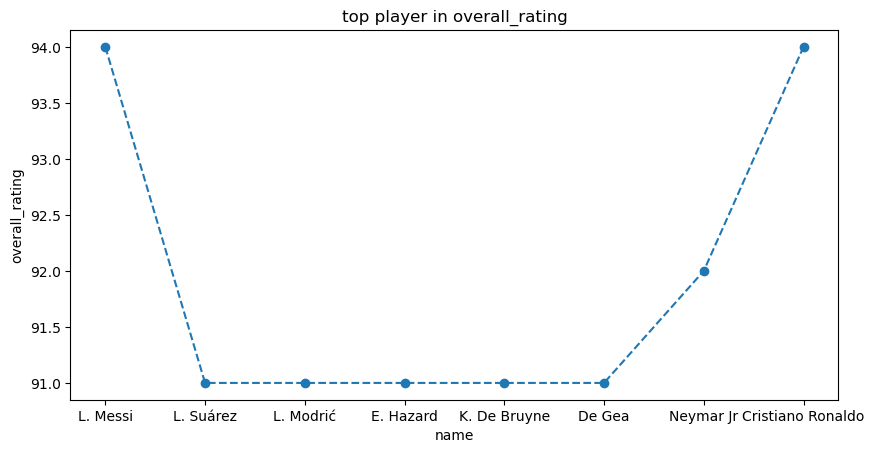

In [11]:
plt.plot(top_o_v["name"] , top_o_v["overall_rating"] , marker = "o", ls = "--" )
plt.subplots_adjust(left = -0.3)


plt.title("top player in overall_rating")
plt.xlabel("name")
plt.ylabel("overall_rating")

plt.show()

in this graph we got the top 8 players in FIFA.

    1- the highest players points in overall rating is 94.0
    2- the lowest players from the top 8 players points in overall rating is 91.0

### top player in value_euro  and wage_euro

## Question researcher 6 :
### the top players in value euro and wage euro  in FIFA .

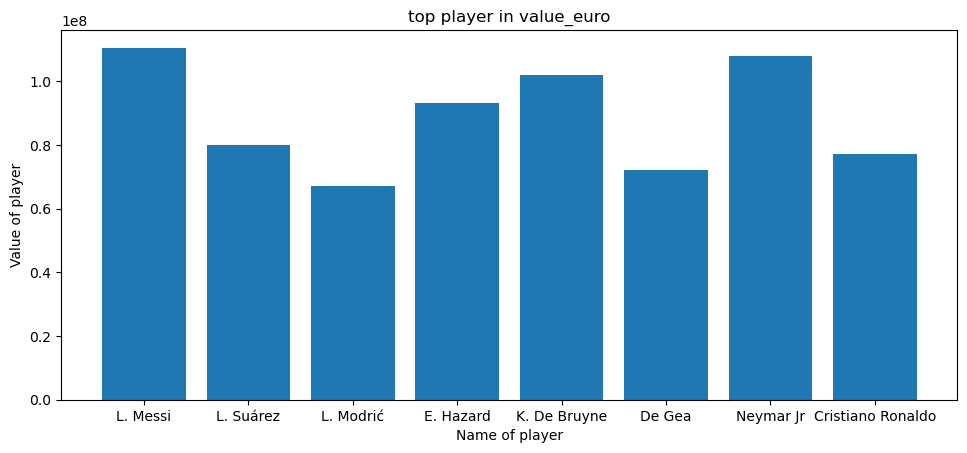

In [12]:
plt.bar(top_o_v["name"] , top_o_v["value_euro"])

plt.title("top player in value_euro")
plt.subplots_adjust(left = -0.5)
plt.xlabel("Name of player")
plt.ylabel("Value of player")
plt.show()

in this graph we got the top 8 players in FIFA.

    1- the highest players in value euro is Messi
    2- the lowest players in value euro is luca modric

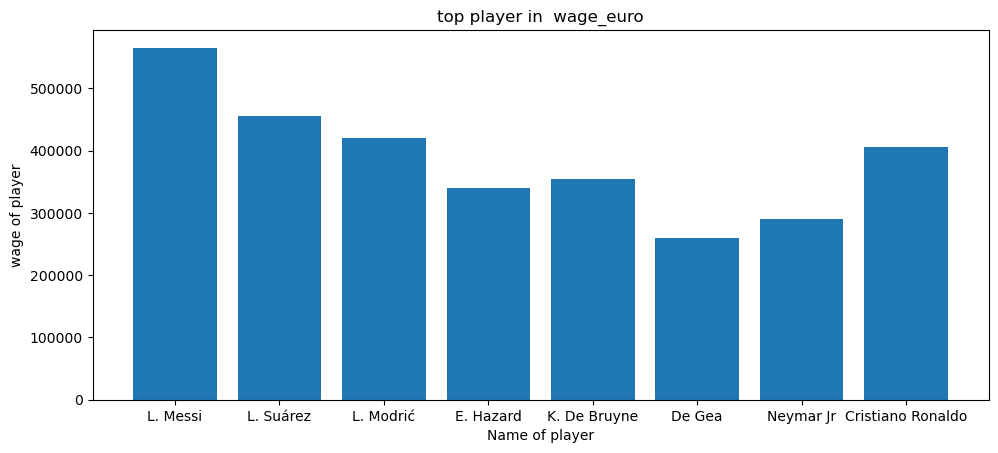

In [13]:
plt.bar(top_o_v["name"] , top_o_v["wage_euro"])

plt.title("top player in  wage_euro")
plt.subplots_adjust(left = -0.5)
plt.xlabel("Name of player")
plt.ylabel("wage of player")
plt.show()

in this graph we got the top 8 players in FIFA.

    1- the highest players in wage euro is Messi
    2- the lowest players in wage euro is luca modric

# Top 50 country have player


## Question researcher 7 :
### top  countries that have professional players.

In [43]:
Countries = df["nationality"].value_counts()
Countries.head(50)

nationality
England                1658
Germany                1199
Spain                  1070
France                  925
Argentina               904
Brazil                  832
Italy                   655
Colombia                624
Japan                   466
Netherlands             441
China PR                396
Sweden                  382
Republic of Ireland     360
Chile                   358
Mexico                  350
Poland                  339
Korea Republic          339
Portugal                335
Norway                  335
United States           333
Saudi Arabia            323
Denmark                 322
Austria                 298
Scotland                277
Turkey                  275
Belgium                 262
Australia               232
Switzerland             210
Uruguay                 135
Croatia                 133
Serbia                  131
Wales                   130
Senegal                 128
Nigeria                 124
Ghana                   119
Czech Re

In [11]:
countries = ["England", "Germany", "Spain", "France", "Argentina", "Brazil", "Italy", "Colombia", "Japan", "Netherlands",
             "China PR", "Sweden", "Republic of Ireland", "Chile", "Mexico", "Poland", "Korea Republic", "Portugal",
             "Norway", "United States", "Saudi Arabia", "Denmark", "Austria", "Scotland", "Turkey", "Belgium",
             "Australia", "Switzerland", "Uruguay", "Croatia", "Serbia", "Wales", "Senegal", "Nigeria", "Ghana",
             "Czech Republic", "Ivory Coast", "Greece", "Paraguay", "Morocco", "Cameroon", "Russia", "Northern Ireland",
             "South Africa", "Finland", "Ukraine", "Canada", "Bosnia Herzegovina", "Slovenia", "Algeria"]

numbers = [1658, 1199, 1070, 925, 904, 832, 655, 624, 466, 441, 396, 382, 360, 358, 350, 339, 339, 335, 335, 333, 323, 322,
           298, 277, 275, 262, 232, 210, 135, 133, 131, 130, 128, 124, 119, 102, 102, 99, 92, 84, 79, 78, 77, 73, 70,
           69, 68, 63, 60, 60]
number_of_player = pd.DataFrame( numbers, countries , columns = ["number of player"] )
#number_of_player


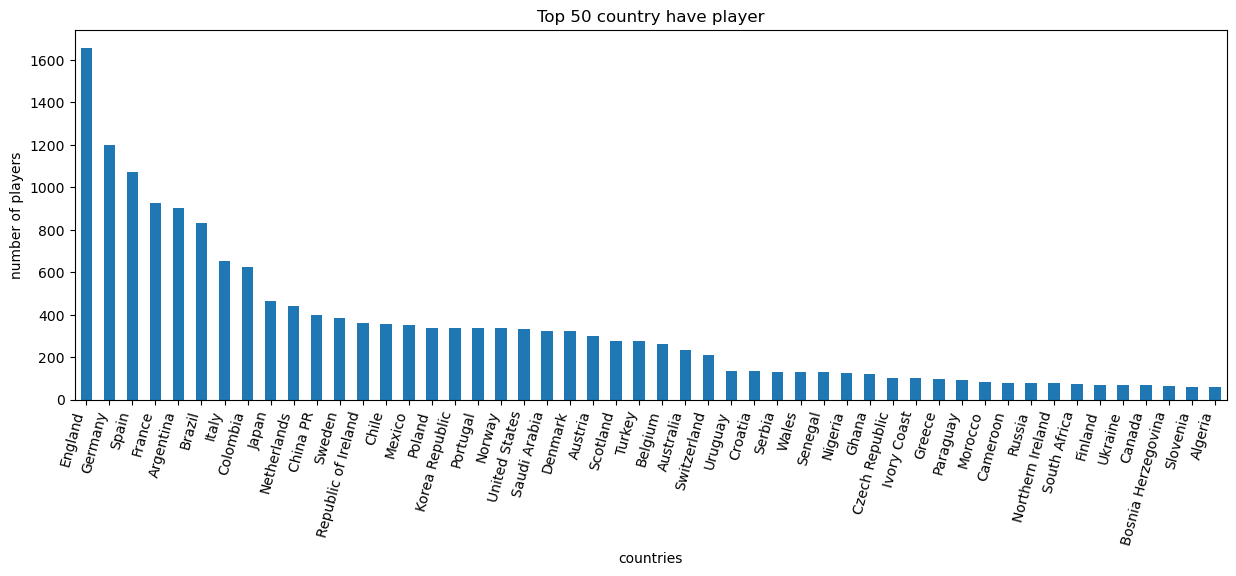

In [15]:
number_of_player.plot(kind='bar', legend=False)

plt.title("Top 50 country have player")
plt.xlabel("countries")
plt.ylabel("number of players")
plt.subplots_adjust(left = -0.9)
plt.xticks(rotation = 75 , ha = "right")
plt.show()

there are 50 countries that have qualified professional players and the top 3 is :

    1- England have 1658 players.
    2- Germany have 1199 players.
    3- Spain have 1070 players.

the lowest 3 countries have professional players is :

    1- Bosina Herzegovina and have 63 players.
    2- Slovenia and have 60 players.
    3- Algeria and have 60 players.


## Question researcher 8 :

### Box Plot in overall rating .¶

In [42]:
import plotly.express as px

# Create a box plot with plotly
fig = px.box(df["overall_rating"], points="all", title='Box Plot in overall rating')

# Customize the box appearance
fig.update_traces(boxmean='sd', jitter=0.3, marker=dict(size=5, color='rgba(0,0,0,0.5)'))

# Show the plot
fig.show()
